In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']
import warnings
warnings.filterwarnings("ignore")

In [2]:
urban_change = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-cardiovascular/Figures/Fig. 3/Fig. 3 urban change rate decomposition (adj).csv')
rural_change = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-cardiovascular/Figures/Fig. 3/Fig. 3 rural change rate decomposition (adj).csv')

In [3]:
urban_change['P3_bottom'] = 0
urban_change['P2_bottom'] = 0
urban_change['P1_bottom'] = 0

rural_change['P3_bottom'] = 0
rural_change['P2_bottom'] = 0
rural_change['P1_bottom'] = 0

In [4]:
for t in range(0,21,1):
    
    if urban_change.iloc[t,16]>0 and urban_change.iloc[t,15]>0:
        urban_change.iloc[t,18]=urban_change.iloc[t,16]
    elif urban_change.iloc[t,16]>0 and urban_change.iloc[t,15]<0:
        urban_change.iloc[t,18]=0
    elif urban_change.iloc[t,16]<0 and urban_change.iloc[t,15]>0:
        urban_change.iloc[t,18]=0
    else: 
        urban_change.iloc[t,18]=urban_change.iloc[t,16]

    if urban_change.iloc[t,14]>0:
        urban_change.iloc[t,19]=max(urban_change.iloc[t,16], urban_change.iloc[t,15], urban_change.iloc[t,16]+urban_change.iloc[t,15])
    else:
        urban_change.iloc[t,19]=min(urban_change.iloc[t,16], urban_change.iloc[t,15], urban_change.iloc[t,16]+urban_change.iloc[t,15])

    if urban_change.iloc[t,13]>0:
        urban_change.iloc[t,20]=max(urban_change.iloc[t,16], 
                                    urban_change.iloc[t,15], 
                                    urban_change.iloc[t,14], 
                                    urban_change.iloc[t,16]+urban_change.iloc[t,15],
                                    urban_change.iloc[t,16]+urban_change.iloc[t,14],
                                    urban_change.iloc[t,15]+urban_change.iloc[t,14],
                                    urban_change.iloc[t,16]+urban_change.iloc[t,15]+urban_change.iloc[t,14])
    else:
        urban_change.iloc[t,20]=min(urban_change.iloc[t,16], 
                                    urban_change.iloc[t,15], 
                                    urban_change.iloc[t,14], 
                                    urban_change.iloc[t,16]+urban_change.iloc[t,15],
                                    urban_change.iloc[t,16]+urban_change.iloc[t,14],
                                    urban_change.iloc[t,15]+urban_change.iloc[t,14],
                                    urban_change.iloc[t,16]+urban_change.iloc[t,15]+urban_change.iloc[t,14])

In [5]:
for t in range(0,21,1):
    
    if rural_change.iloc[t,16]>0 and rural_change.iloc[t,15]>0:
        rural_change.iloc[t,18]=rural_change.iloc[t,16]
    elif rural_change.iloc[t,16]>0 and rural_change.iloc[t,15]<0:
        rural_change.iloc[t,18]=0
    elif rural_change.iloc[t,16]<0 and rural_change.iloc[t,15]>0:
        rural_change.iloc[t,18]=0
    else: 
        rural_change.iloc[t,18]=rural_change.iloc[t,16]

    if rural_change.iloc[t,14]>0:
        rural_change.iloc[t,19]=max(rural_change.iloc[t,16], rural_change.iloc[t,15], rural_change.iloc[t,16]+rural_change.iloc[t,15])
    else:
        rural_change.iloc[t,19]=min(rural_change.iloc[t,16], rural_change.iloc[t,15], rural_change.iloc[t,16]+rural_change.iloc[t,15])

    if rural_change.iloc[t,13]>0:
        rural_change.iloc[t,20]=max(rural_change.iloc[t,16], 
                                    rural_change.iloc[t,15], 
                                    rural_change.iloc[t,14], 
                                    rural_change.iloc[t,16]+rural_change.iloc[t,15],
                                    rural_change.iloc[t,16]+rural_change.iloc[t,14],
                                    rural_change.iloc[t,15]+rural_change.iloc[t,14],
                                    rural_change.iloc[t,16]+rural_change.iloc[t,15]+rural_change.iloc[t,14])
    else:
        rural_change.iloc[t,20]=min(rural_change.iloc[t,16], 
                                    rural_change.iloc[t,15], 
                                    rural_change.iloc[t,14], 
                                    rural_change.iloc[t,16]+rural_change.iloc[t,15],
                                    rural_change.iloc[t,16]+rural_change.iloc[t,14],
                                    rural_change.iloc[t,15]+rural_change.iloc[t,14],
                                    rural_change.iloc[t,16]+rural_change.iloc[t,15]+rural_change.iloc[t,14])

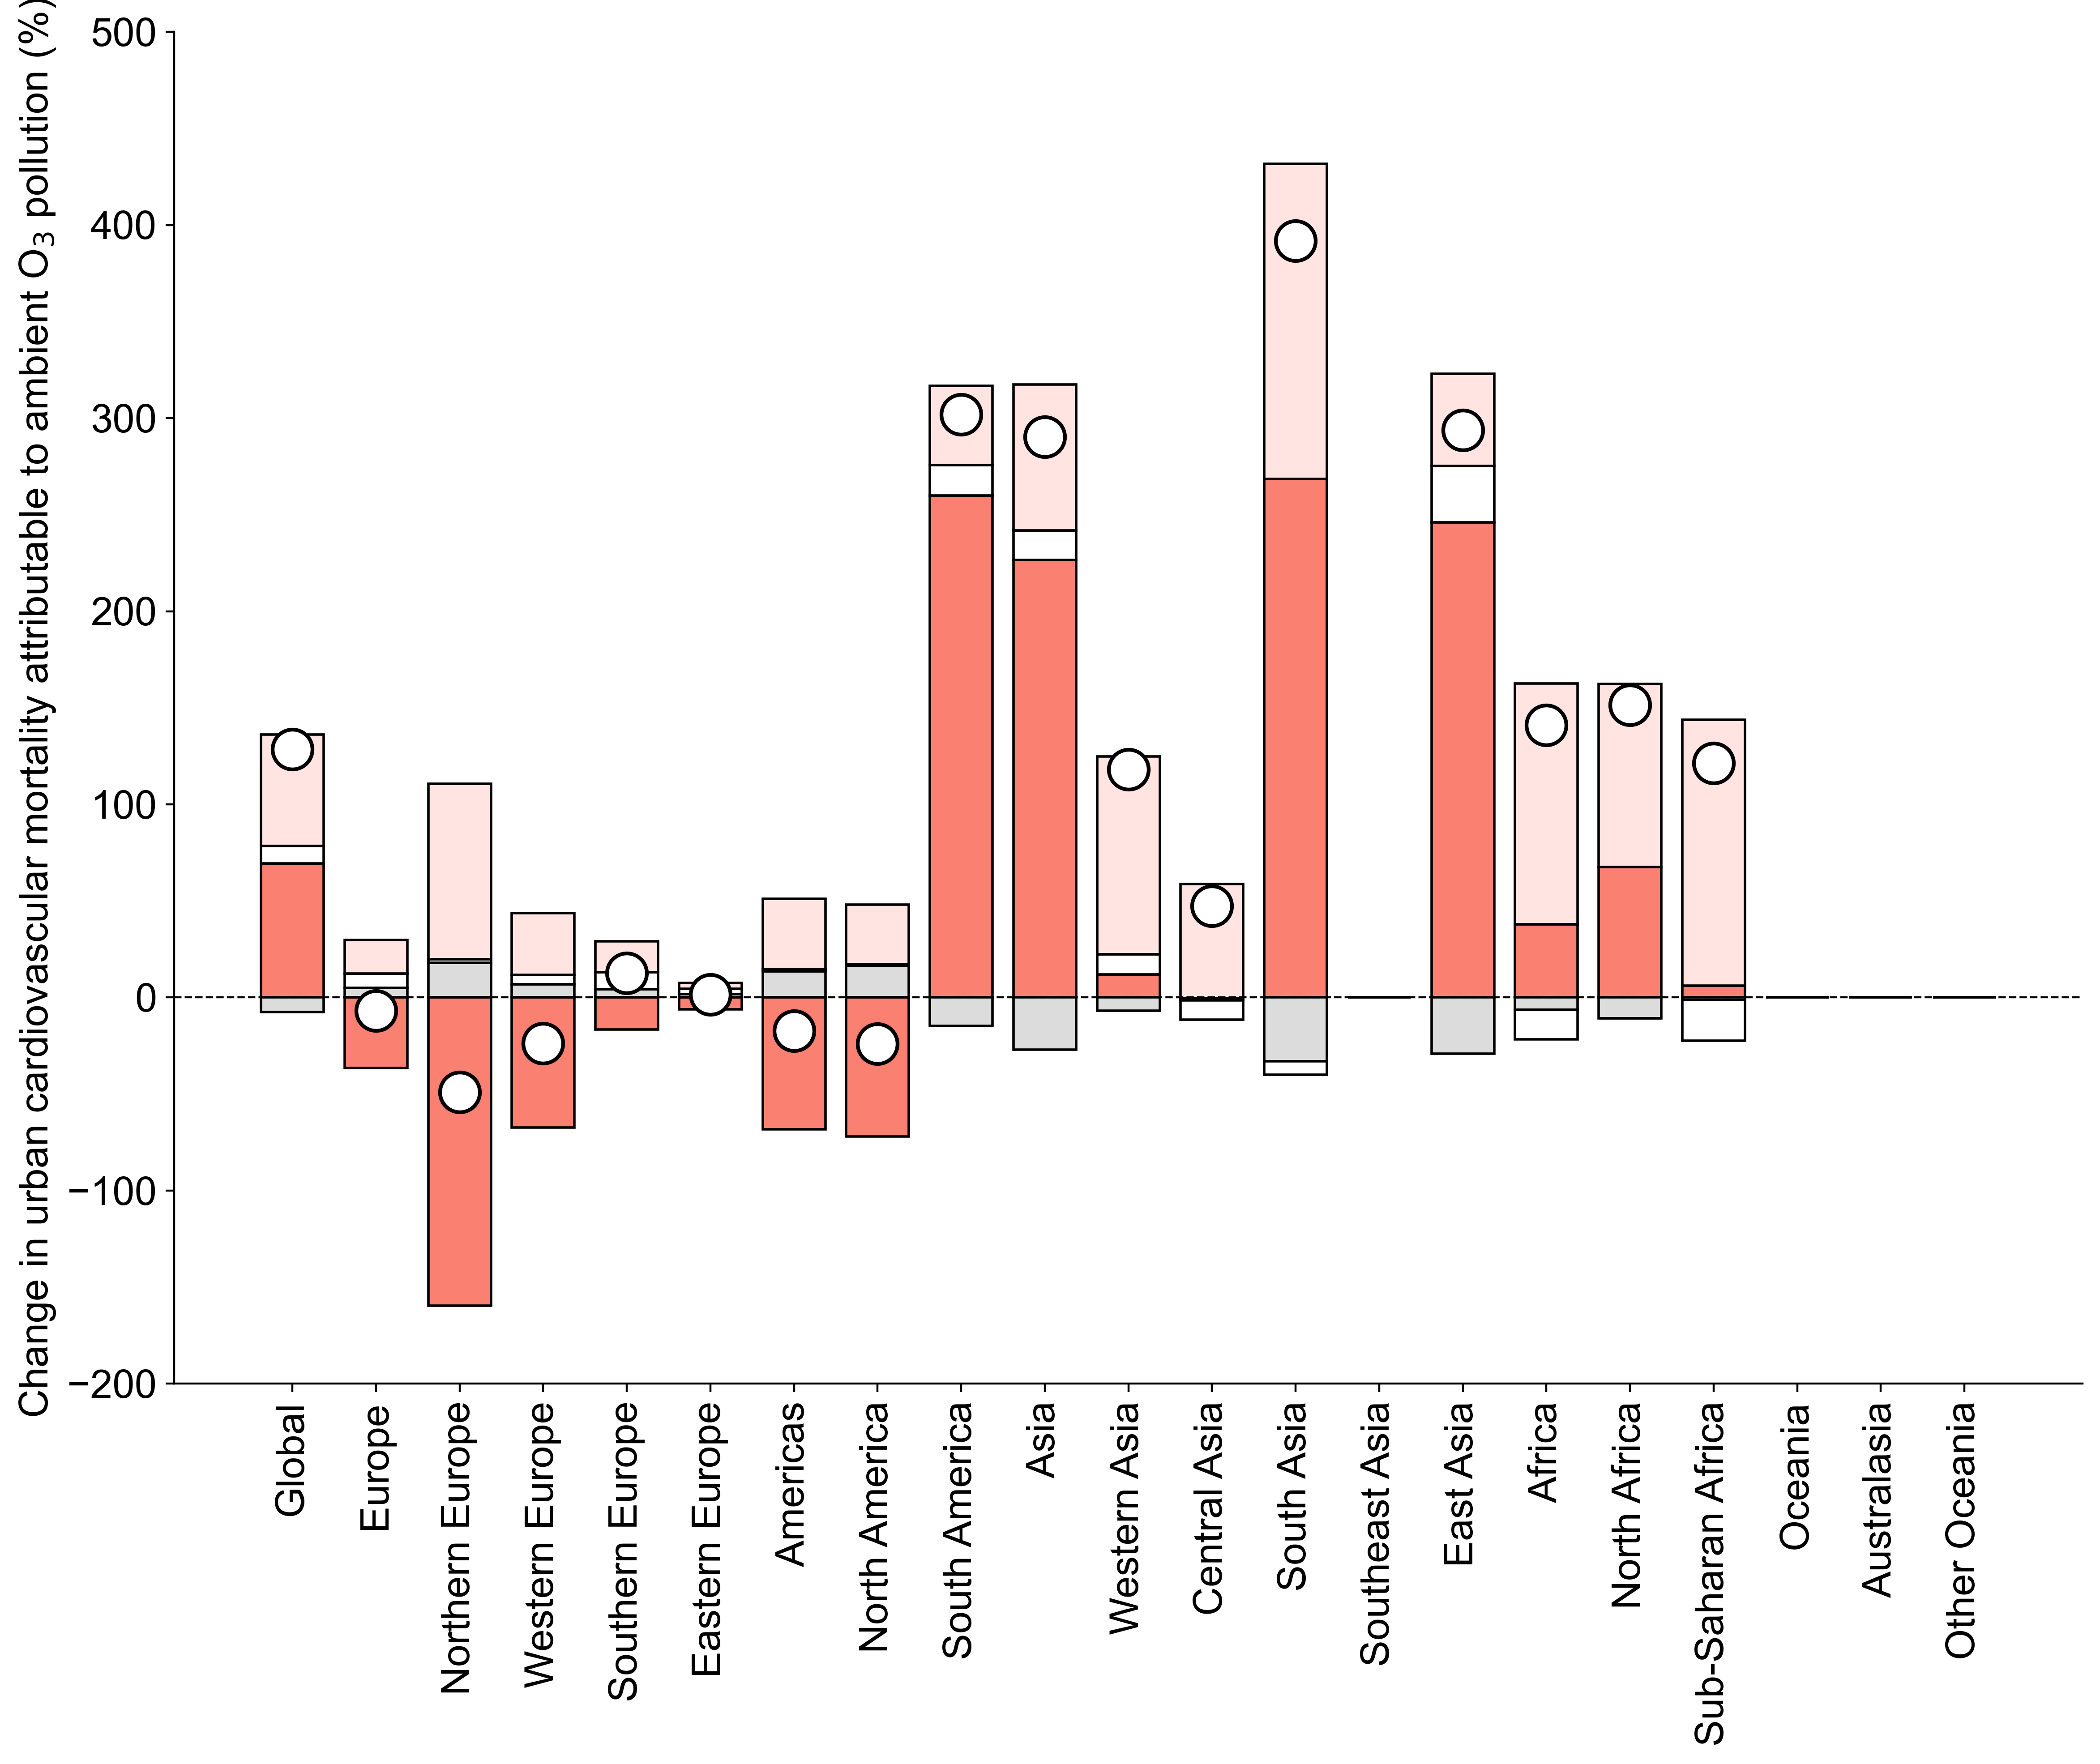

In [6]:
f = plt.figure(num=None, figsize=(13.75, 10), dpi=400, facecolor='w', edgecolor='k')
data = urban_change

P = data['Region']

X1 = data['P1']
X2 = data['P2']
X3 = data['P3']
X4 = data['P4']
Y  = data['Sum']

P3_bottom = data['P3_bottom']
P2_bottom = data['P2_bottom']
P1_bottom = data['P1_bottom']

a = 0.750

plt.axhline(y=0, color='black', linestyle='--', linewidth = 0.8)

plt.bar(P, X4, width=a, color = 'salmon', bottom = 0, edgecolor='black')
plt.bar(P, X3, width=a, color = 'gainsboro', bottom = P3_bottom, edgecolor='black')
plt.bar(P, X2, width=a, color = 'white', bottom = P2_bottom, edgecolor='black')
plt.bar(P, X1, width=a, color = 'mistyrose', bottom = P1_bottom, edgecolor='black')

plt.plot(P, Y, color='black', marker='o', markerfacecolor='white', markeredgewidth = 1.5, linewidth = 0, markersize=16)

plt.ylabel("Change in urban cardiovascular mortality attributable to ambient O${_3}$ pollution (%)", fontsize=16)

plt.ylim(-200,500)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=90)

ax=plt.gca()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

plt.show()

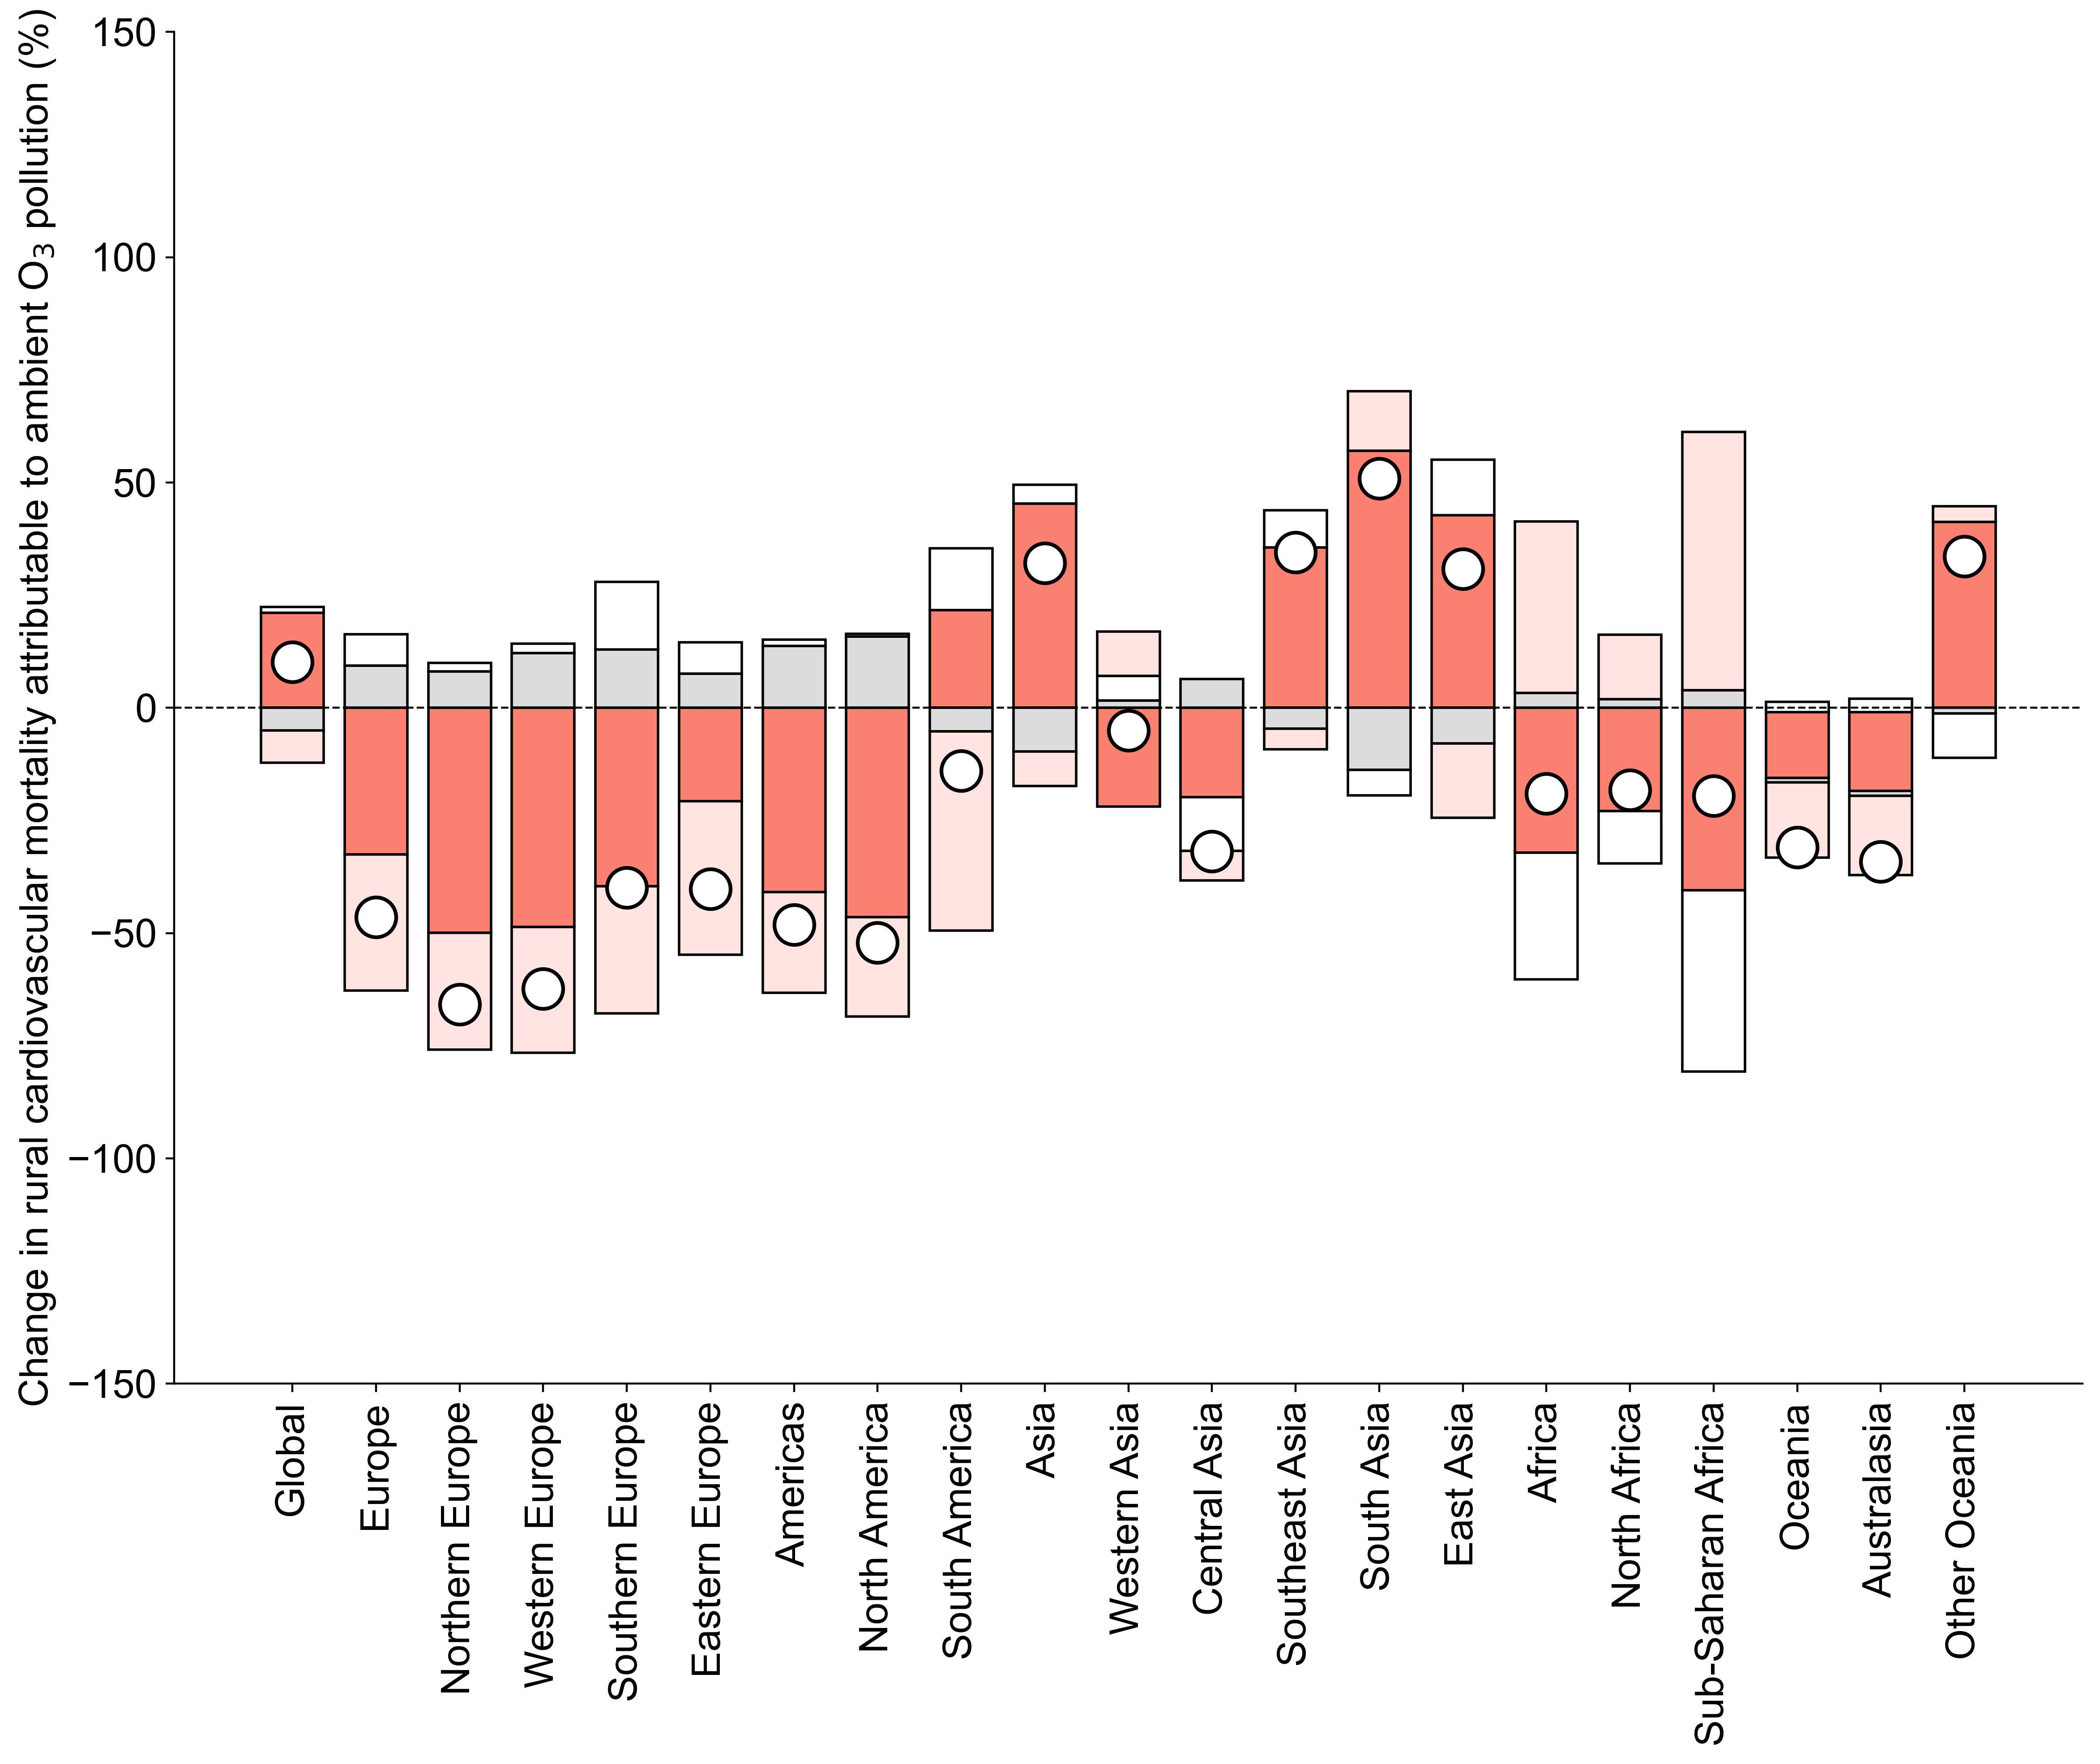

In [7]:
f = plt.figure(num=None, figsize=(13.75, 10), dpi=400, facecolor='w', edgecolor='k')
data = rural_change

P = data['Region']

X1 = data['P1']
X2 = data['P2']
X3 = data['P3']
X4 = data['P4']
Y  = data['Sum']

P3_bottom = data['P3_bottom']
P2_bottom = data['P2_bottom']
P1_bottom = data['P1_bottom']

a = 0.750

plt.axhline(y=0, color='black', linestyle='--', linewidth = 0.8)

plt.bar(P, X4, width=a, color = 'salmon', bottom = 0, edgecolor='black')
plt.bar(P, X3, width=a, color = 'gainsboro', bottom = P3_bottom, edgecolor='black')
plt.bar(P, X2, width=a, color = 'white', bottom = P2_bottom, edgecolor='black')
plt.bar(P, X1, width=a, color = 'mistyrose', bottom = P1_bottom, edgecolor='black')

plt.plot(P, Y, color='black', marker='o', markerfacecolor='white', markeredgewidth = 1.5, linewidth = 0, markersize=16)

plt.ylabel("Change in rural cardiovascular mortality attributable to ambient O${_3}$ pollution (%)", fontsize=16)

plt.ylim(-150,150)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=90)

ax=plt.gca()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

plt.show()